# Effetti di Gamma sulla Convergenza nel caso di weak recovery

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from utils import *
from sbm_class import *
from neal_batched import *
from neal_sequential import *
from batched import *
from sequential import *
from metrics import *

In [2]:
np.random.seed(123)

In [3]:
weak = False

# initialization parameter
alpha = 0.27

# set parameters for the network
n = 400
k = 4

if weak:
    p = 0.17
    q = 0.08
else:
    p = 0.4
    q = 0.2
# set parameters for the samplers
n_iter = 25
burn_in = 0

alpha_p = 1
beta_p = 1
alpha_q = 1
beta_q = 1

# changing parameters
pi = np.ones(k) # deterministic prior
gamma_list = [0, 0.1, 1, 10, 10000, 1000000]

# number of runs 
N = 20

In [4]:
# generate the network
sbm = Homogeneous_SBM(n, k, p, q, Neal=False)
A = sbm.get_A()
z = sbm.get_z()
# warm initialization
z_init = warm_initializer(z, alpha, n, k)

In [5]:
# for N iterations, run all samplers (batched and Neal batched with the different values of gamma)
# and store in a dataframe all the label at each iteration
p_list = np.zeros((len(gamma_list)+1, N, n_iter))
q_list = np.zeros((len(gamma_list)+1, N, n_iter))
loss_list =  np.zeros((len(gamma_list)+1, N, n_iter))

for iter in range(1, N+1):
    print("Deterministic prior, iteration ", iter)
    sampler = batched_Gibbs_sampler(A, z_init, alpha_p, beta_p, alpha_q, beta_q, pi_pri = pi)
    sampler.run(n_iter, burn_in)
    z_list_batched = sampler.get_z_list()
    losses_batched = [loss(z, z_list_batched[i])[0] for i in range(n_iter)]
    loss_list[0, iter-1, :] = losses_batched
    p_list[0, iter-1, :] = sampler.get_p_list()
    q_list[0, iter-1, :] = sampler.get_q_list()

for j, gamma in enumerate(gamma_list):
    for iter in range(1, N+1):
        print("Gamma = ", gamma, ", iteration ", iter)
        sampler = Neal_batched_Gibbs_sampler(A, z_init, alpha_p, beta_p, alpha_q, beta_q, gamma = gamma)
        sampler.run(n_iter, burn_in)
        z_list = sampler.get_z_list()
        losses = [loss(z, z_list[i])[0] for i in range(n_iter)]
        loss_list[j+1, iter-1, :] = losses
        p_list[j+1, iter-1, :] = sampler.get_p_list()
        q_list[j+1, iter-1, :] = sampler.get_q_list()


Deterministic prior, iteration  1


100%|██████████| 25/25 [00:00<00:00, 133.28it/s]


Deterministic prior, iteration  2


100%|██████████| 25/25 [00:00<00:00, 135.06it/s]


Deterministic prior, iteration  3


100%|██████████| 25/25 [00:00<00:00, 141.66it/s]


Deterministic prior, iteration  4


100%|██████████| 25/25 [00:00<00:00, 141.23it/s]


Deterministic prior, iteration  5


100%|██████████| 25/25 [00:00<00:00, 146.75it/s]


Deterministic prior, iteration  6


100%|██████████| 25/25 [00:00<00:00, 152.56it/s]

Deterministic prior, iteration  7



100%|██████████| 25/25 [00:00<00:00, 138.34it/s]


Deterministic prior, iteration  8


100%|██████████| 25/25 [00:00<00:00, 147.11it/s]


Deterministic prior, iteration  9


100%|██████████| 25/25 [00:00<00:00, 142.82it/s]


Deterministic prior, iteration  10


100%|██████████| 25/25 [00:00<00:00, 138.39it/s]


Deterministic prior, iteration  11


100%|██████████| 25/25 [00:00<00:00, 146.90it/s]


Deterministic prior, iteration  12


100%|██████████| 25/25 [00:00<00:00, 149.46it/s]


Deterministic prior, iteration  13


100%|██████████| 25/25 [00:00<00:00, 143.50it/s]


Deterministic prior, iteration  14


100%|██████████| 25/25 [00:00<00:00, 143.20it/s]


Deterministic prior, iteration  15


100%|██████████| 25/25 [00:00<00:00, 146.98it/s]


Deterministic prior, iteration  16


100%|██████████| 25/25 [00:00<00:00, 146.23it/s]


Deterministic prior, iteration  17


100%|██████████| 25/25 [00:00<00:00, 147.44it/s]


Deterministic prior, iteration  18


100%|██████████| 25/25 [00:00<00:00, 119.71it/s]


Deterministic prior, iteration  19


100%|██████████| 25/25 [00:00<00:00, 154.35it/s]

Deterministic prior, iteration  20



100%|██████████| 25/25 [00:00<00:00, 144.14it/s]


Gamma =  0 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 134.76it/s]


Gamma =  0 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 125.07it/s]


Gamma =  0 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 135.08it/s]


Gamma =  0 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 131.79it/s]


Gamma =  0 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 137.98it/s]


Gamma =  0 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 138.13it/s]


Gamma =  0 , iteration  7


100%|██████████| 25/25 [00:00<00:00, 130.76it/s]


Gamma =  0 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 137.05it/s]


Gamma =  0 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 131.71it/s]


Gamma =  0 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 135.33it/s]


Gamma =  0 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 138.27it/s]


Gamma =  0 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 130.60it/s]


Gamma =  0 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 131.74it/s]


Gamma =  0 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 136.32it/s]


Gamma =  0 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 131.63it/s]


Gamma =  0 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 138.20it/s]


Gamma =  0 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 131.48it/s]


Gamma =  0 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 105.45it/s]


Gamma =  0 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 135.43it/s]


Gamma =  0 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 132.06it/s]


Gamma =  0.1 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 139.53it/s]


Gamma =  0.1 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 134.66it/s]


Gamma =  0.1 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 138.65it/s]


Gamma =  0.1 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 126.93it/s]


Gamma =  0.1 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 133.57it/s]


Gamma =  0.1 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 138.39it/s]

Gamma =  0.1 , iteration  7



100%|██████████| 25/25 [00:00<00:00, 137.45it/s]


Gamma =  0.1 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 136.30it/s]


Gamma =  0.1 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 138.15it/s]


Gamma =  0.1 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 139.77it/s]


Gamma =  0.1 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 136.27it/s]


Gamma =  0.1 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 138.60it/s]


Gamma =  0.1 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 137.68it/s]


Gamma =  0.1 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 136.43it/s]


Gamma =  0.1 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 137.92it/s]


Gamma =  0.1 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 134.69it/s]


Gamma =  0.1 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 114.28it/s]


Gamma =  0.1 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 135.64it/s]


Gamma =  0.1 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 131.55it/s]


Gamma =  0.1 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 135.70it/s]


Gamma =  1 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 134.58it/s]


Gamma =  1 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 138.18it/s]


Gamma =  1 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 138.45it/s]


Gamma =  1 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 135.93it/s]


Gamma =  1 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 142.66it/s]


Gamma =  1 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 135.58it/s]


Gamma =  1 , iteration  7


100%|██████████| 25/25 [00:00<00:00, 132.77it/s]


Gamma =  1 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 140.37it/s]


Gamma =  1 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 139.74it/s]


Gamma =  1 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 142.58it/s]


Gamma =  1 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 130.39it/s]


Gamma =  1 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 138.16it/s]


Gamma =  1 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 138.93it/s]


Gamma =  1 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 137.67it/s]


Gamma =  1 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 103.27it/s]


Gamma =  1 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 129.17it/s]


Gamma =  1 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 132.62it/s]


Gamma =  1 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 137.29it/s]


Gamma =  1 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 139.98it/s]


Gamma =  1 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 131.53it/s]


Gamma =  10 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 137.84it/s]


Gamma =  10 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 131.46it/s]


Gamma =  10 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 138.17it/s]


Gamma =  10 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 113.17it/s]


Gamma =  10 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 135.26it/s]


Gamma =  10 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 134.45it/s]


Gamma =  10 , iteration  7


100%|██████████| 25/25 [00:00<00:00, 135.91it/s]


Gamma =  10 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 131.67it/s]


Gamma =  10 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 132.61it/s]


Gamma =  10 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 135.33it/s]


Gamma =  10 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 137.90it/s]


Gamma =  10 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 138.67it/s]


Gamma =  10 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 136.44it/s]


Gamma =  10 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 130.90it/s]


Gamma =  10 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 114.34it/s]


Gamma =  10 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 135.21it/s]


Gamma =  10 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 139.90it/s]


Gamma =  10 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 137.59it/s]


Gamma =  10 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 113.50it/s]


Gamma =  10 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 137.36it/s]


Gamma =  10000 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 131.73it/s]


Gamma =  10000 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 109.83it/s]


Gamma =  10000 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 131.89it/s]


Gamma =  10000 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 139.58it/s]


Gamma =  10000 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 130.61it/s]


Gamma =  10000 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 131.85it/s]


Gamma =  10000 , iteration  7


100%|██████████| 25/25 [00:00<00:00, 135.92it/s]


Gamma =  10000 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 131.84it/s]


Gamma =  10000 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 136.10it/s]


Gamma =  10000 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 133.52it/s]


Gamma =  10000 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 126.70it/s]


Gamma =  10000 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 138.53it/s]


Gamma =  10000 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 112.73it/s]


Gamma =  10000 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 136.82it/s]


Gamma =  10000 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 139.61it/s]


Gamma =  10000 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 136.07it/s]


Gamma =  10000 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 138.12it/s]


Gamma =  10000 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 137.60it/s]


Gamma =  10000 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 140.25it/s]


Gamma =  10000 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 135.38it/s]


Gamma =  1000000 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 139.50it/s]


Gamma =  1000000 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 136.71it/s]


Gamma =  1000000 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 131.84it/s]


Gamma =  1000000 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 137.66it/s]


Gamma =  1000000 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 135.09it/s]


Gamma =  1000000 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 136.66it/s]


Gamma =  1000000 , iteration  7


100%|██████████| 25/25 [00:00<00:00, 133.24it/s]


Gamma =  1000000 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 139.90it/s]


Gamma =  1000000 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 108.78it/s]


Gamma =  1000000 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 133.27it/s]


Gamma =  1000000 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 138.29it/s]


Gamma =  1000000 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 134.85it/s]


Gamma =  1000000 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 139.76it/s]


Gamma =  1000000 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 132.11it/s]


Gamma =  1000000 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 137.80it/s]


Gamma =  1000000 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 131.27it/s]


Gamma =  1000000 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 138.49it/s]


Gamma =  1000000 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 128.18it/s]


Gamma =  1000000 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 136.07it/s]


Gamma =  1000000 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 133.96it/s]


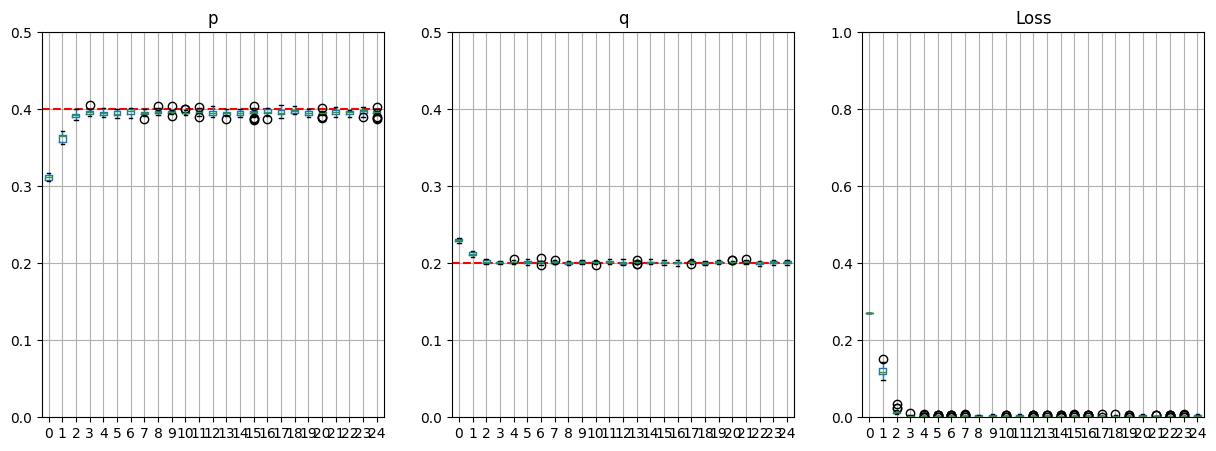

Gamma:  0


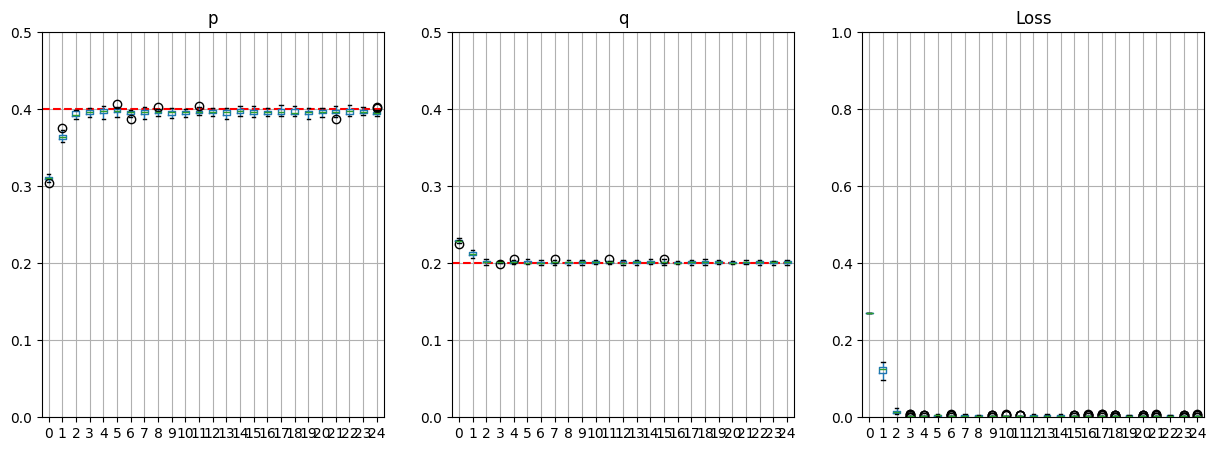

Gamma:  0.1


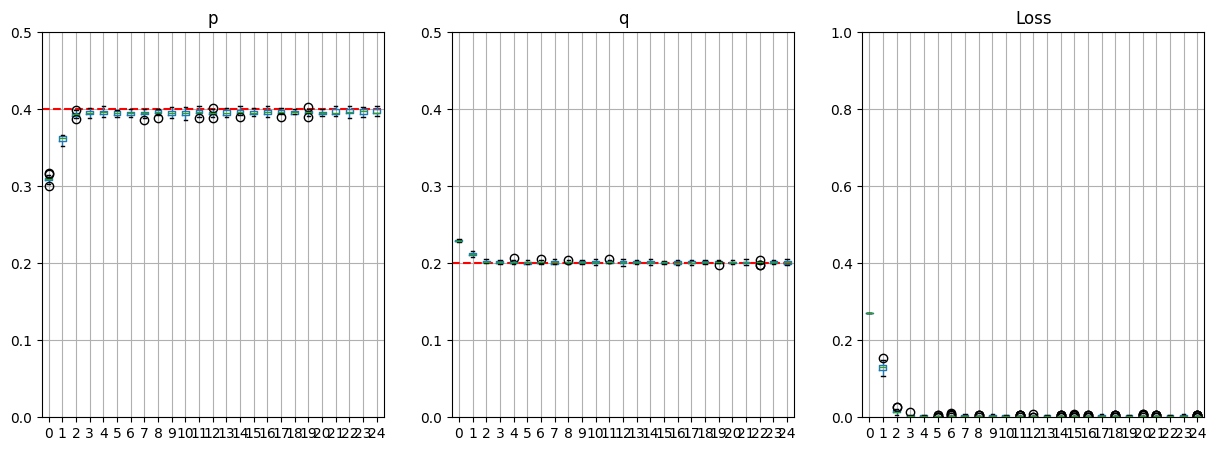

Gamma:  1


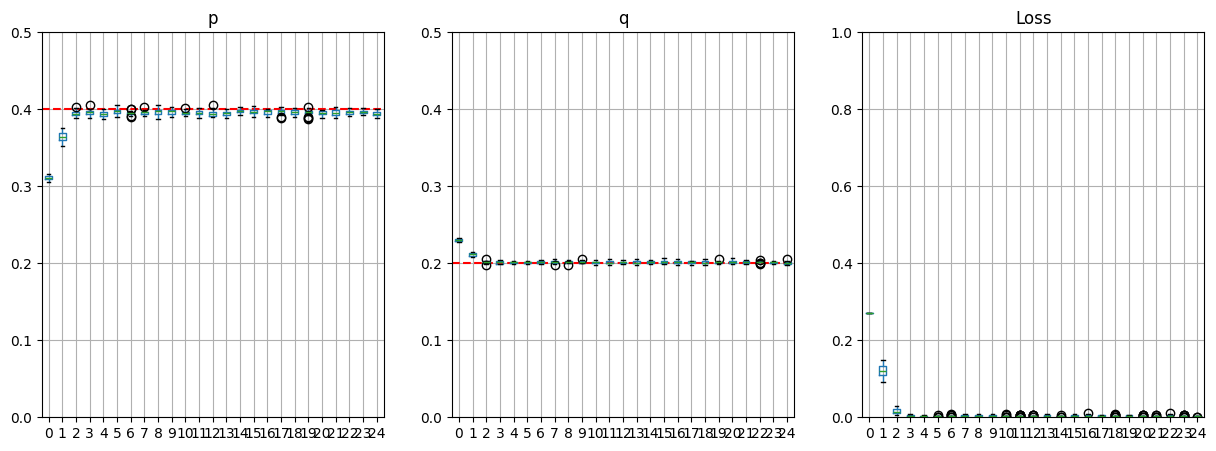

Gamma:  10


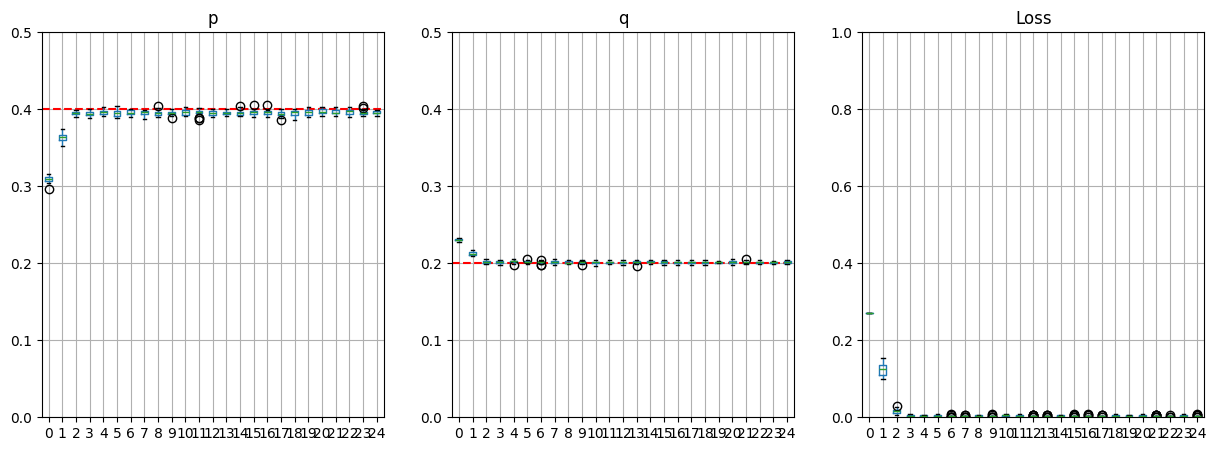

Gamma:  10000


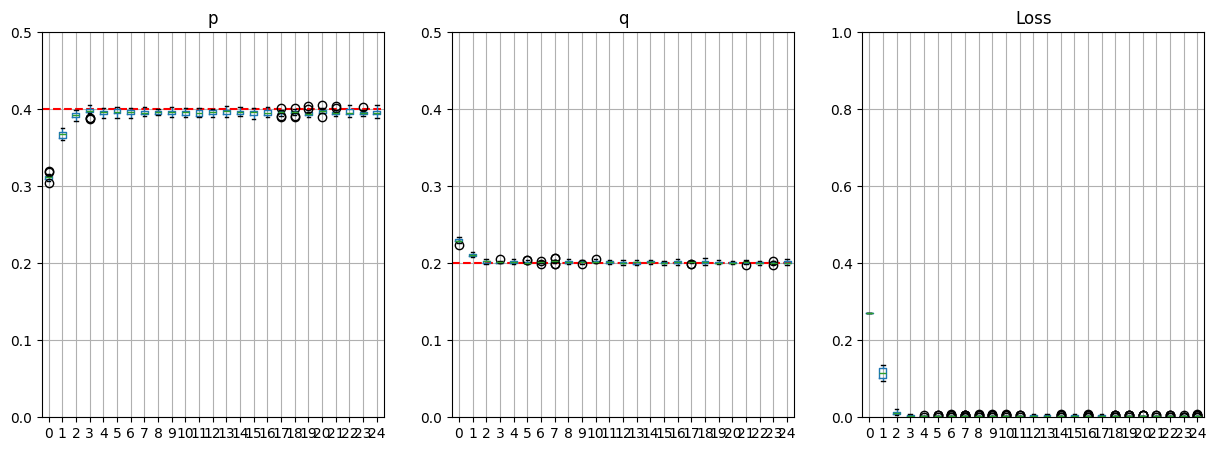

Gamma:  1000000


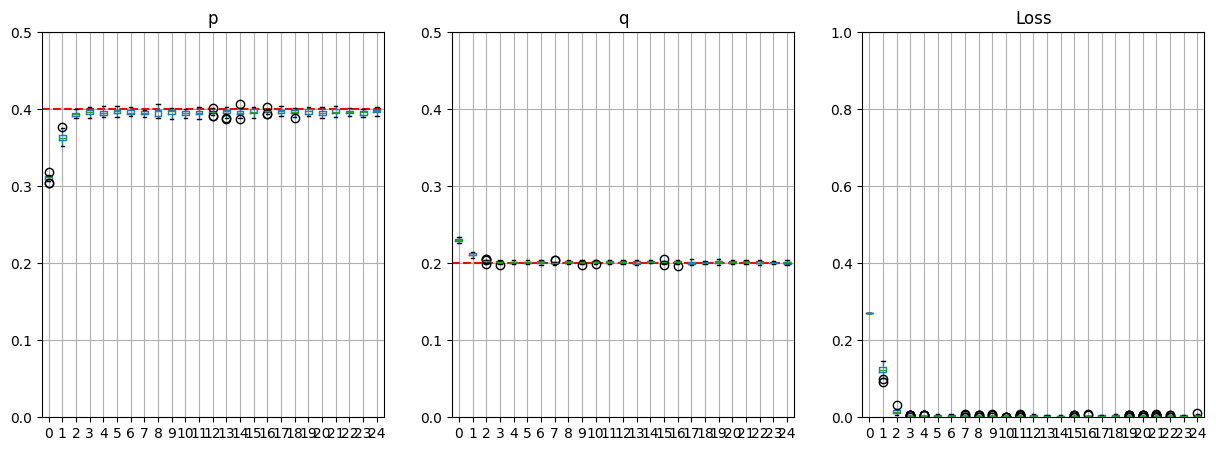

In [6]:
p_lim = 0.5
q_lim = 0.5
loss_lim = 1
pic = True


# plot the results
# deterministic prior first
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.title("p")
plt.axhline(y=p, color='r', linestyle='--')
df_p = pd.DataFrame(p_list[0])
df_p.boxplot()
plt.ylim(0, p_lim)
plt.subplot(1,3,2)
plt.title("q")
plt.axhline(y=q, color='r', linestyle='--')
df_q = pd.DataFrame(q_list[0])
df_q.boxplot()
plt.ylim(0, q_lim)
plt.subplot(1,3,3)
plt.title("Loss")
df_loss = pd.DataFrame(loss_list[0])
df_loss.boxplot()
plt.ylim(0, loss_lim)
if pic: plt.savefig(f'gamma_plots/alpha_{alpha}_det_r_{N}_steps_{n_iter}.png')
plt.show()

for a, gamma in enumerate(gamma_list):
    df_p = pd.DataFrame(p_list[a+1])
    df_q = pd.DataFrame(q_list[a+1])
    df_loss = pd.DataFrame(loss_list[a+1])
    print("Gamma: ", gamma)
    plt.figure(figsize=(15, 5))
    plt.subplot(1,3,1)
    plt.title("p")
    plt.axhline(y=p, color='r', linestyle='--')
    df_p.boxplot()
    plt.ylim(0, p_lim)
    plt.subplot(1,3,2)
    plt.title("q")
    plt.axhline(y=q, color='r', linestyle='--')
    df_q.boxplot()
    plt.ylim(0, q_lim)
    plt.subplot(1,3,3)
    plt.title("Loss")
    df_loss.boxplot()
    plt.ylim(0, loss_lim)

        
    if pic: plt.savefig(f'gamma_plots/alpha_{alpha}_gamma{gamma}_r_{N}_steps_{n_iter}.png')

    plt.show()


To make it more immediate, we count the number of runs that have reached the true stationary distribution.

In [7]:
# threshold for the loss
threshold = 0.1
# compute the percentage of runs that have a loss below the threshold
print("Deterministic prior")
# for the N runs, we check if the loss is below the threshold once in the last 10 iterations
conv = np.sum(loss_list[0, :, -10:] < threshold, axis=1)>0
conv = np.sum(conv)
print("Percentage of runs with loss below threshold: ", conv / N)
for a, gamma in enumerate(gamma_list):
    print("Gamma: ", gamma)
    conv = np.sum(loss_list[a+1, :, -10:] < threshold, axis=1)>0
    conv = np.sum(conv)
    print("Percentage of runs with loss below threshold: ", conv / N)

Deterministic prior
Percentage of runs with loss below threshold:  1.0
Gamma:  0
Percentage of runs with loss below threshold:  1.0
Gamma:  0.1
Percentage of runs with loss below threshold:  1.0
Gamma:  1
Percentage of runs with loss below threshold:  1.0
Gamma:  10
Percentage of runs with loss below threshold:  1.0
Gamma:  10000
Percentage of runs with loss below threshold:  1.0
Gamma:  1000000
Percentage of runs with loss below threshold:  1.0
